In [1]:
import pandas as pd
import matplotlib.pyplot as plt

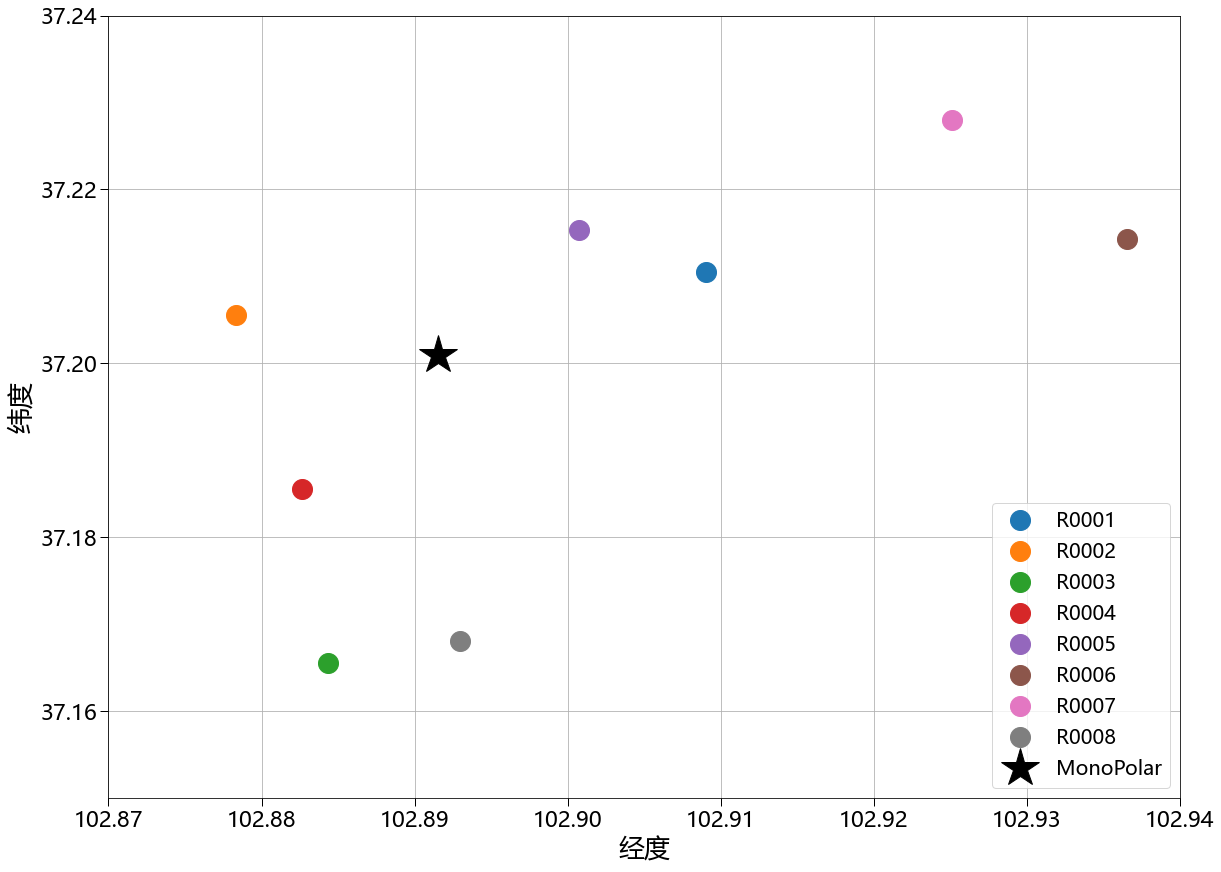

In [2]:
plt.figure(figsize=(6.4 * 3, 4.8 * 3))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.ylabel('纬度', fontdict={'weight': 'normal','size': 26})
plt.xlabel('经度', fontdict={'weight': 'normal','size': 26})
plt.ylim(37.15, 37.24)
plt.xlim(102.87, 102.94)
plt.grid(True)
plt.tick_params(width=1.0, length=8, labelsize=22)
# plt.xticks([102.876,102.886,102.896,102.906,102.916,102.926,102.936,102.945])
# plt.yticks([37.16,37.17,37.18,37.19,37.20,37.21,37.22,37.23,37.24])
info = pd.read_excel(r"E:\rainfall\Location_based_analysis\under_wind\data\wsl\StationInfo_wsl.xlsx")
info = info[:].reset_index()
station, lon, lat = info['台站号'], info['经度'], info['纬度']
for j in range(8):
    plt.plot(lon[j], lat[j], 'o', markersize=20, label=station[j])    
plt.plot(lon[12], lat[12], '*', c='k', label=station[12], markersize=40)
plt.legend(loc=4, markerscale=1,fontsize=20)
plt.savefig("E:\\rainfall\\Location_based_analysis\\heatmap\\plot\\wsl_station.png")

## 插值

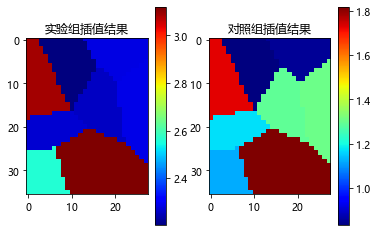

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


points = np.array([[37.210511,102.909013],[37.20551,102.878327],[37.165511,102.884368],[37.185618,102.882639],[37.215397,102.900749],[37.214248,102.936537],[37.228041,102.925111],[37.168056,102.892945]]) #real

values = np.array([2.259907594,3.08486863,2.563889543,2.27134932,2.204280506,2.28910368,2.285007458,3.11693058])   
valuse_CG = np.array([1.290712,1.729943303,1.123616726,1.170988225,0.832142561,1.306629076,0.85511074,1.816008055])

#xi,yi = np.mgrid[37.235:37.155:18j, 102.881:102.941:14j]
xi,yi = np.mgrid[37.24:37.15:36j, 102.87:102.94:28j]

# grid就是插值结果，你想要的到的区间的每个点数据都在这个grid矩阵里
grid = griddata(points, values, (xi, yi), method="nearest", fill_value=0)
grid_CG =  griddata(points, valuse_CG, (xi, yi), method="nearest", fill_value=0)

# 这里通过imshow显示时，坐标思维要按照计算机的来，普通图片是2维数组
# x 是最终结果的第一维，下标是从上到下由零增加
# y 是最终结果的第二维，下标是从左到右由零增加
plt.subplot(1,2,1)
plt.title("实验组插值结果")
plt.imshow(grid, cmap='jet')  # contourf jet gray
plt.colorbar()

plt.subplot(1,2,2)
plt.title("对照组插值结果")
plt.imshow(grid_CG, cmap='jet')  # contourf jet gray
plt.colorbar()
plt.savefig("E:\\rainfall\\Location_based_analysis\\heatmap\\plot\\wsl_interpolate.png")
plt.show()

#grid_CG


## on-off得到张量，画heatmap

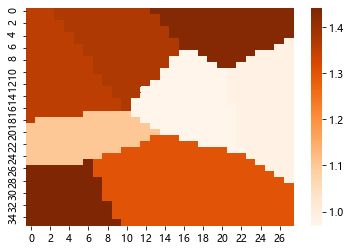

In [12]:
import seaborn as sns

R1 = grid-grid_CG

fig = plt.figure()
sns_plot = sns.heatmap(R1,cmap='Oranges')
plt.savefig("E:\\rainfall\\Location_based_analysis\\heatmap\\plot\\wsl_heatmap.png")
plt.show()


## 算乌鞘岭的风向

In [14]:
import pandas as pd
df=pd.read_excel(r"E:\rainfall\Location_based_analysis\RainMap\data\wsl\wind.xlsx")
df.set_index(df['Time'],inplace=True)
df=df[['WD','WV']]
df = df.resample('D').mean()
df.to_csv("E:\\rainfall\\Location_based_analysis\\heatmap\\data\\wsl_wind.csv")